In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()

723

In [6]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

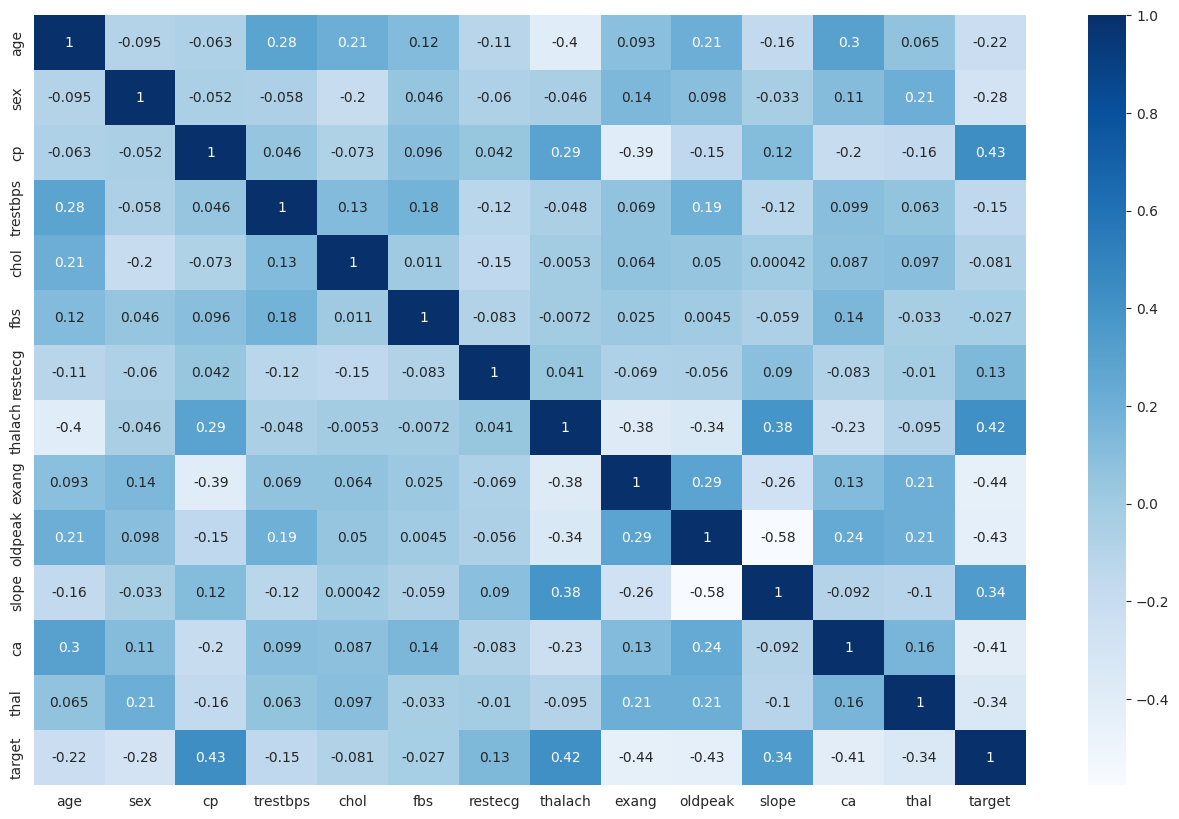

In [9]:

plt.figure(figsize=(16,10))
sns.heatmap(hd.corr(), annot = True , cmap = 'Blues')

In [10]:
# thalach = maximum heart rate achieved
# cp = chest pain type (4 values)

In [11]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [12]:
categories = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric = ['age','trestbps','chol','thalach','oldpeak']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

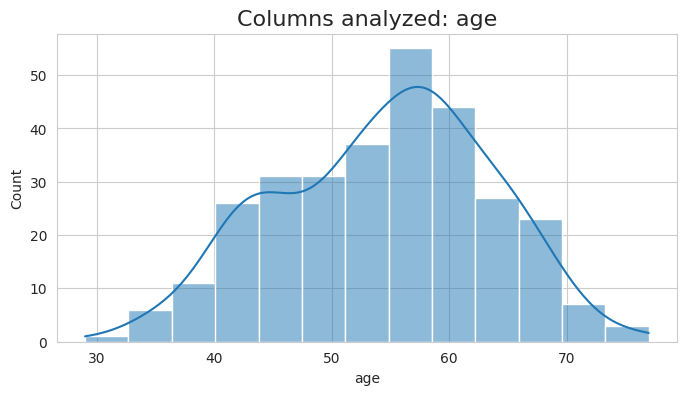

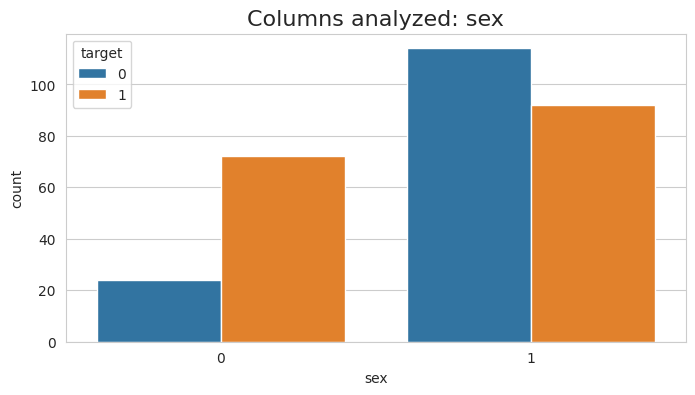

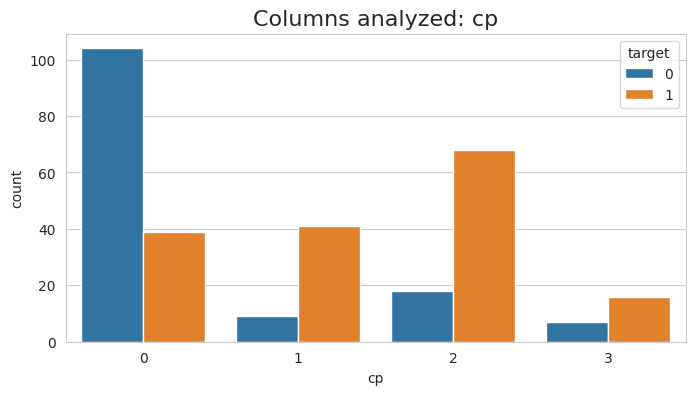

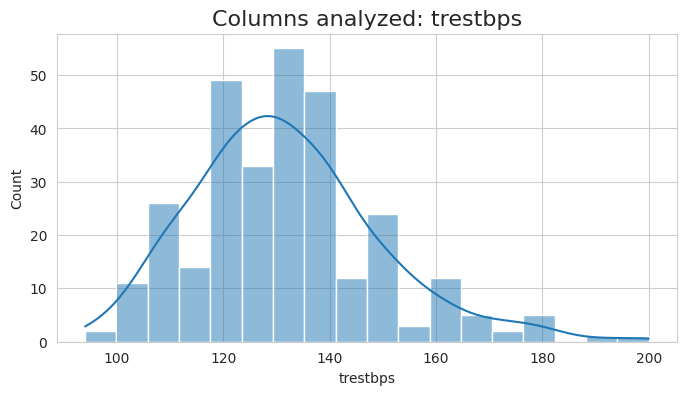

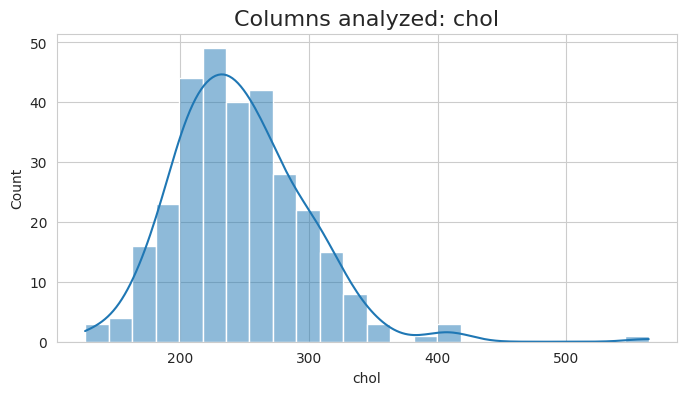

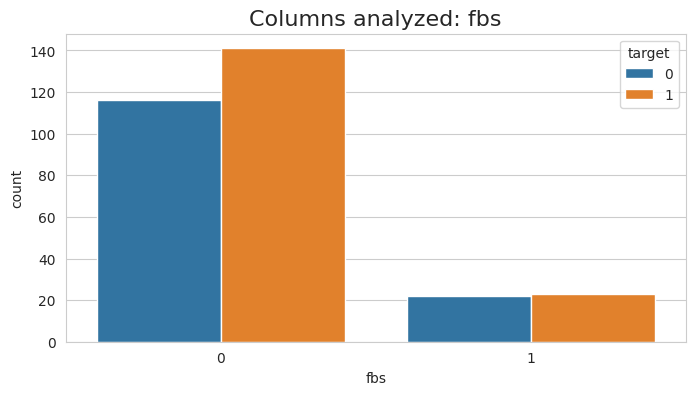

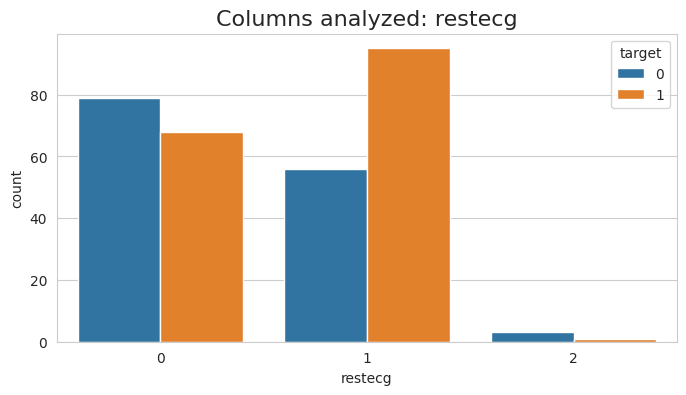

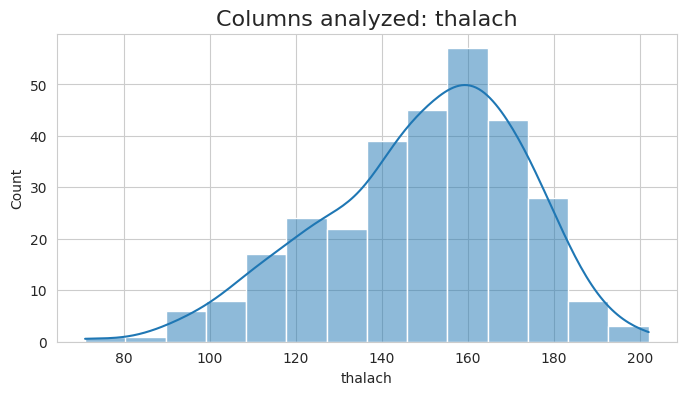

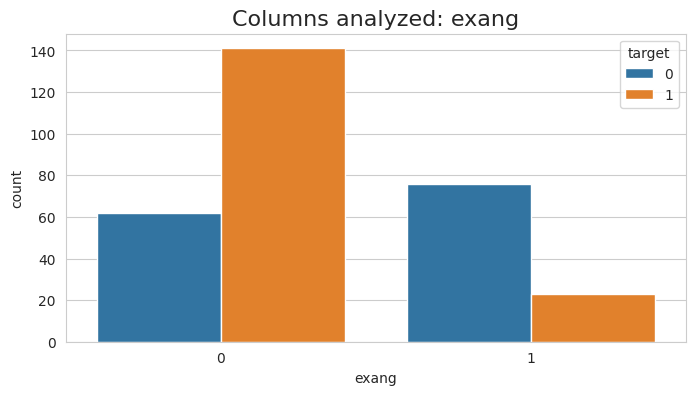

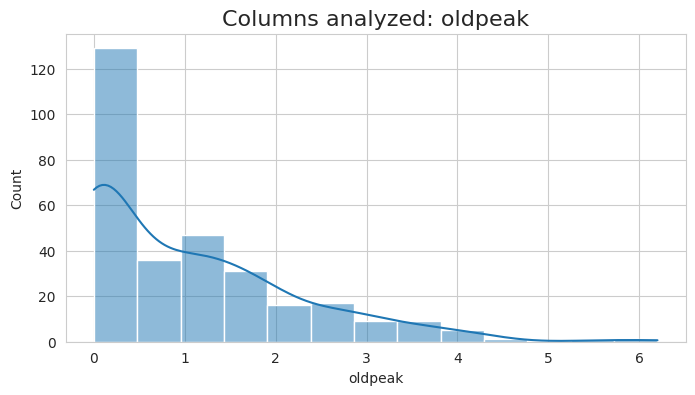

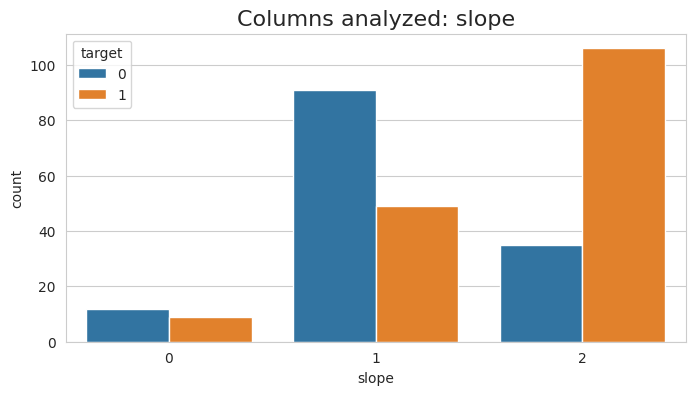

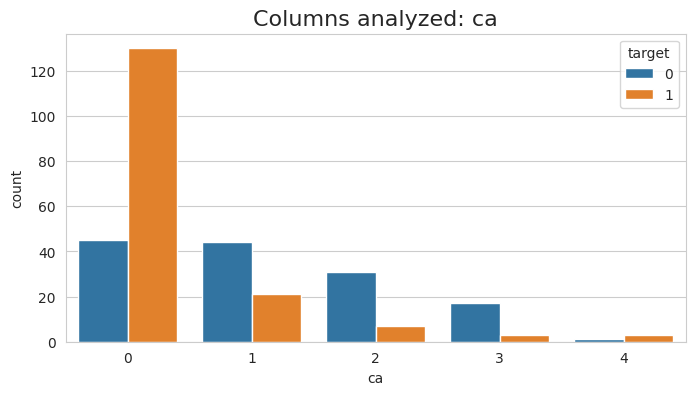

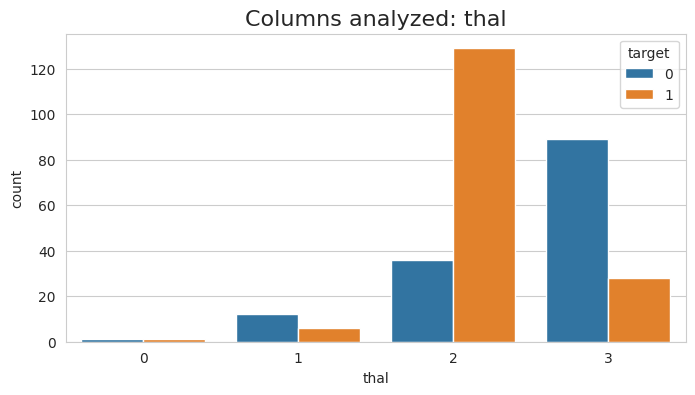

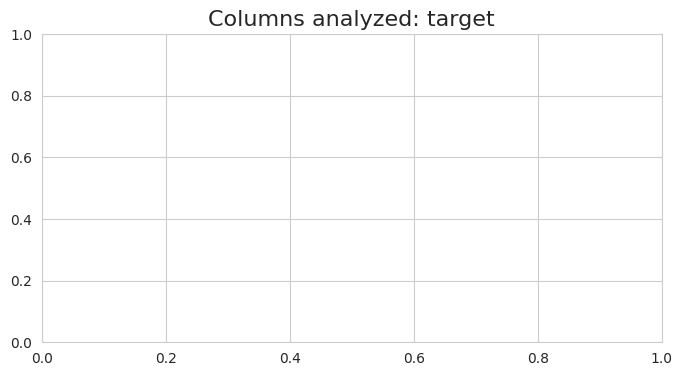

In [13]:
# To have a better view of each column.

for c in hd.columns:
    plt.figure(figsize=(8,4))
    plt.title(f"Columns analyzed: {c}", fontsize=16)
    if c in categories:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numeric:
        sns.histplot(hd[c], kde = True)

In [14]:
# Removing Outliers

In [15]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

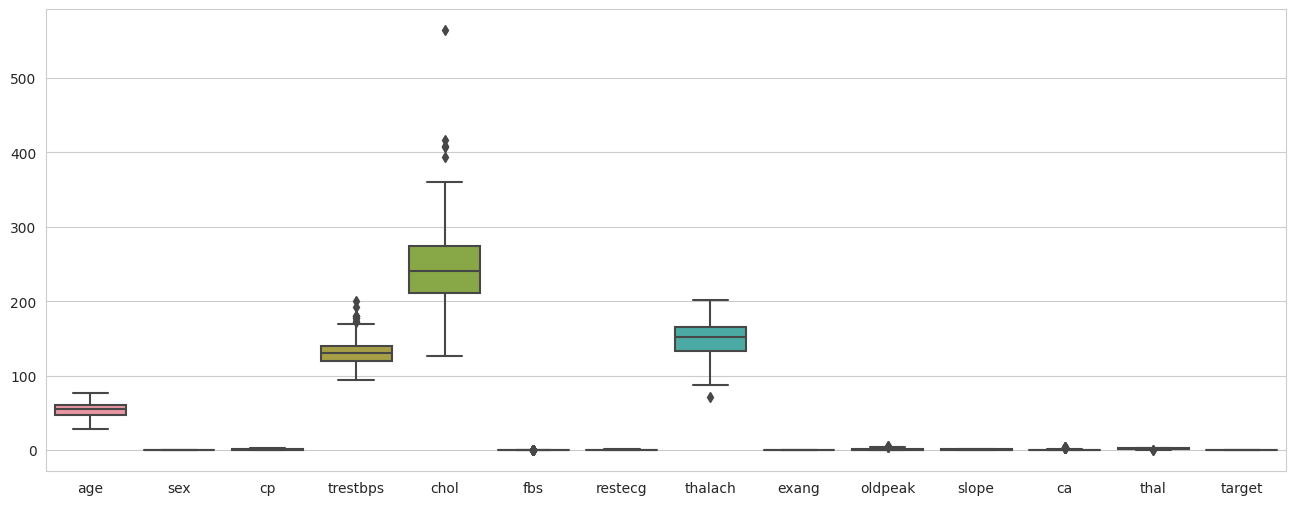

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(data = hd)

In [17]:
# Removing 1% of Outliers of ['trestbps']
hd['trestbps'].quantile(0.99)

180.0

In [18]:
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]

In [19]:
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

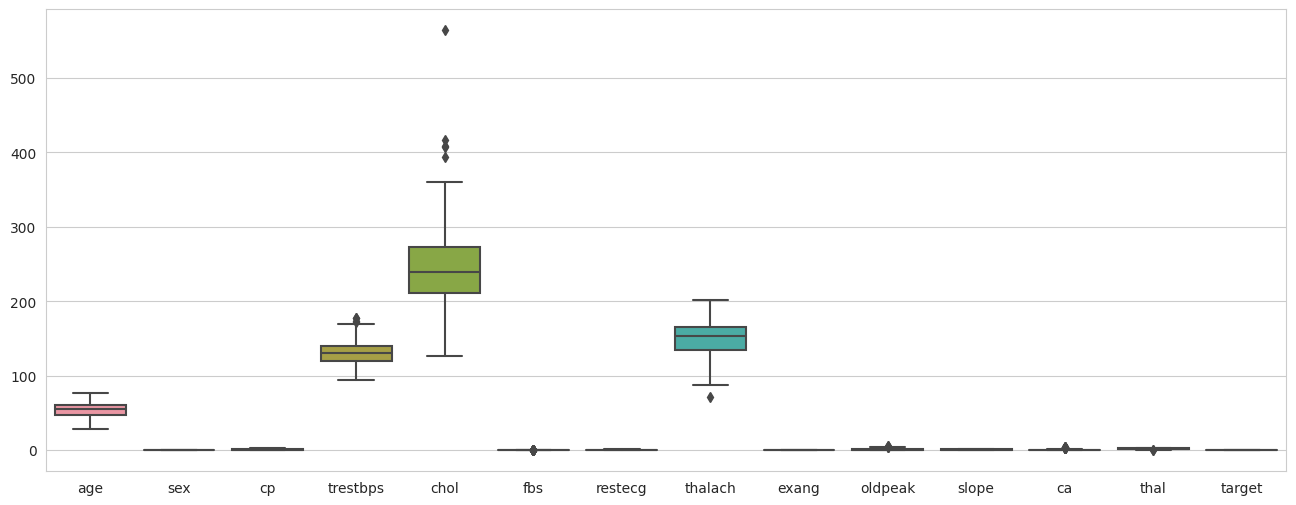

In [20]:
plt.figure(figsize=(16,6))
sns.boxplot(data = hd1)

In [21]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]


<Axes: >

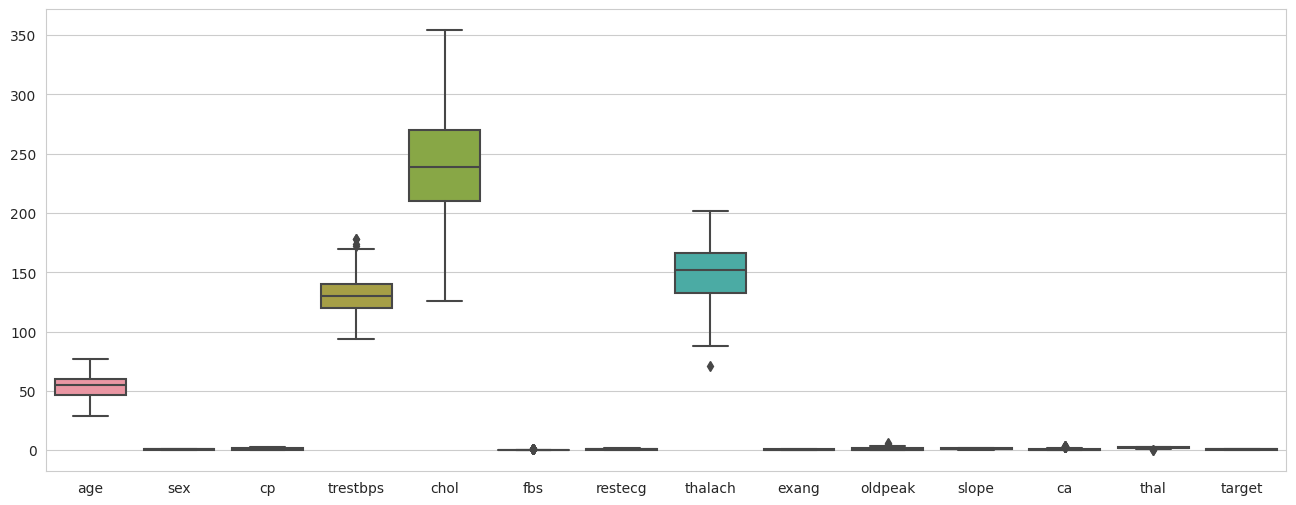

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(data = hd2)

In [24]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.004)]

<Axes: >

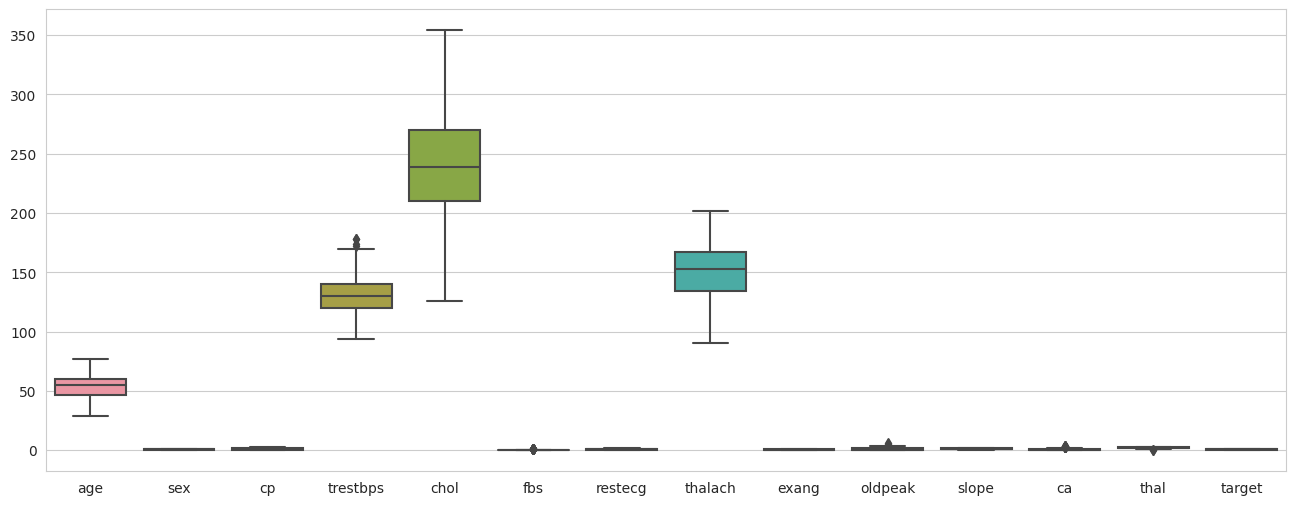

In [25]:
plt.figure(figsize=(16,6))
sns.boxplot(data = hd3)

In [26]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
hd3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


------

In [28]:
categories = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric = ['age','trestbps','chol','thalach','oldpeak']

In [29]:
hd3[categories].info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 878
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sex      289 non-null    int64
 1   cp       289 non-null    int64
 2   fbs      289 non-null    int64
 3   restecg  289 non-null    int64
 4   exang    289 non-null    int64
 5   slope    289 non-null    int64
 6   ca       289 non-null    int64
 7   thal     289 non-null    int64
dtypes: int64(8)
memory usage: 20.3 KB


In [30]:
# Transforming categories columns to 0 or 1 values for each option category
hd4 = pd.get_dummies(hd3, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'], drop_first=True)
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,160,273,125,0.0,0,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [31]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [32]:
# Iniciate ML Model Variables.

X = hd4.drop('target', axis = 1)
y = hd4['target']
print(X.shape)
print(y.shape)


(289, 22)
(289,)


In [33]:
# Divide X and y among random data according with test_size defined
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [34]:
y_train

109    0
74     0
71     0
94     1
26     1
      ..
286    1
80     0
129    1
599    1
124    0
Name: target, Length: 231, dtype: int64

_____

In [35]:
# Lets Test ML model with LogisticRegression First

log = LogisticRegression(max_iter=1000)

In [36]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
print(log.score(X_train,y_train))
print(log.score(X_test,y_test))

0.8701298701298701
0.8275862068965517


In [38]:
# In this case 'y_predicted' represents the predicted values learned by the model above(Logistic Regression)
y_predicted = log.predict(X_test)
y_predicted

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

___


## 3 Methods to Measure 

In [39]:
accuracy_score(y_test,y_predicted)

0.8275862068965517

In [40]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58



In [41]:
confusion_matrix(y_test,y_predicted)

array([[17,  7],
       [ 3, 31]])

In [42]:
def rel_ml(df,algo , opt=2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=42)
    
    if opt == 0:
        ml = algo(max_iter=1000)
    elif opt ==1:
        ml = algo(n_estimators = 1000)
    elif opt ==2:
        ml = algo()
    
    ml.fit(X_train,y_train)
    score_train = ml.score(X_train,y_train)
    print(f"Accuracy training:{score_train*100:.2f}%")
    score_test = ml.score(X_test,y_test)
    print(f"Accuracy test:{score_test*100:.2f}%")
    
    y_predicted = log.predict(X_test)
    print("---CLASSIFICATION REPORT---")
    print(classification_report(y_test,y_predicted))
    
    print("---CONFUSION MATRIX---")
    conf=confusion_matrix(y_test,y_predicted)
    sns.heatmap(conf, annot = True , cmap = 'Blues')
    
    return score_train,score_test

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy training:87.88%
Accuracy test:84.48%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

---CONFUSION MATRIX---


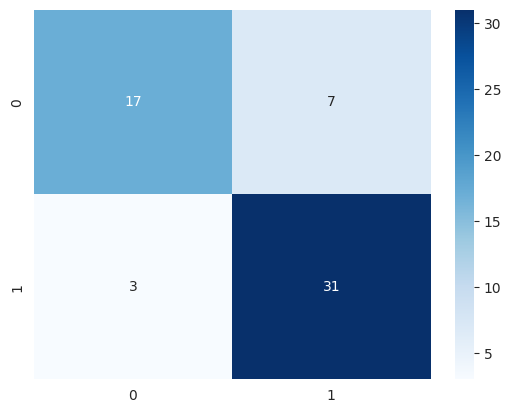

In [43]:
log_train , log_test = rel_ml(hd4,LogisticRegression, opt=2)

Accuracy training:100.00%
Accuracy test:74.14%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

---CONFUSION MATRIX---


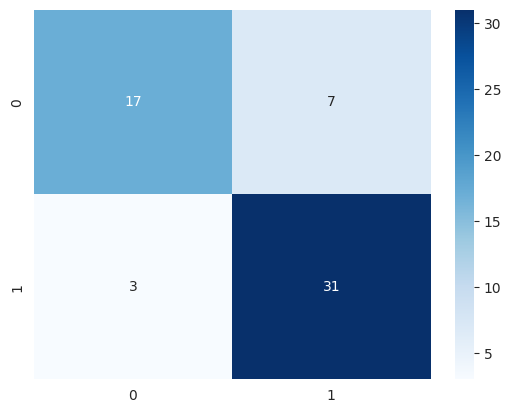

In [44]:
tree_train, tree_test = rel_ml(hd4,DecisionTreeClassifier)

Accuracy training:92.21%
Accuracy test:81.03%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

---CONFUSION MATRIX---


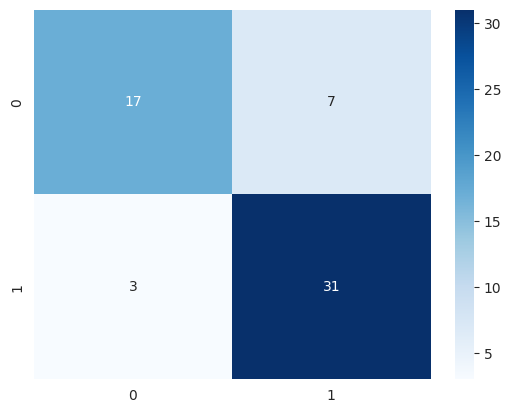

In [45]:
ada_train, ada_test = rel_ml(hd4,AdaBoostClassifier)

In [46]:
#kn_train, kn_test = rel_ml(hd4, KNeighborsClassifier)

Accuracy training:100.00%
Accuracy test:75.86%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

---CONFUSION MATRIX---


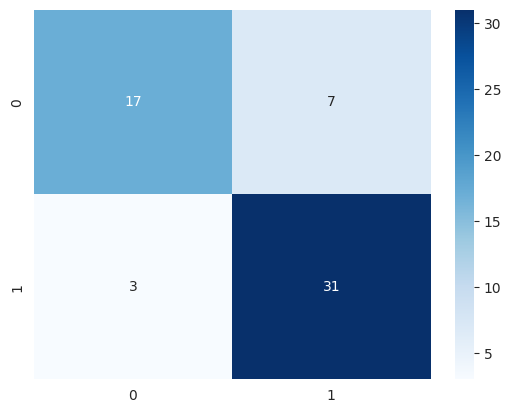

In [47]:
rand_train, rand_test = rel_ml(hd4, RandomForestClassifier)

In [48]:
data = {'Models without Scaler':['RandomForestClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression'],
       'Accuracy training':[round(rand_train*100,2),round(ada_train*100,2),round(tree_train*100,2),round(log_train*100,2)],
       'Accuracy test':[round(rand_test*100,2),round(ada_test*100,2),round(tree_test*100,2),round(log_test*100,2)]
       }

In [49]:
new_df = pd.DataFrame(data)
new_df.sort_values(by='Accuracy test', ascending=False, inplace=True)
new_df

,Models without Scaler,Accuracy training,Accuracy test
3,LogisticRegression,87.88,84.48
1,AdaBoostClassifier,92.21,81.03
0,RandomForestClassifier,100.00,75.86
2,DecisionTreeClassifier,100.00,74.14


In [50]:
def rel_ml_scaler(df,algo , opt=2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=42)
    
    scaler = StandardScaler()
    cols_scaler = ['age','trestbps','chol','thalach','oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
    
    
    if opt == 0:
        ml = algo(max_iter=1000)
    elif opt ==1:
        ml = algo(n_estimators = 1000)
    elif opt ==2:
        ml = algo()
    
    ml.fit(X_train,y_train)
    score_train = ml.score(X_train,y_train)
    print(f"Accuracy training:{score_train*100:.2f}%")
    score_test = ml.score(X_test,y_test)
    print(f"Accuracy test:{score_test*100:.2f}%")
    
    y_predicted = log.predict(X_test)
    print("---CLASSIFICATION REPORT---")
    print(classification_report(y_test,y_predicted))
    
    print("---CONFUSION MATRIX---")
    conf=confusion_matrix(y_test,y_predicted)
    sns.heatmap(conf, annot = True , cmap = 'Blues')
    
    return score_train,score_test

Accuracy training:87.01%
Accuracy test:84.48%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.74      1.00      0.85        34

    accuracy                           0.79        58
   macro avg       0.87      0.75      0.76        58
weighted avg       0.85      0.79      0.77        58

---CONFUSION MATRIX---


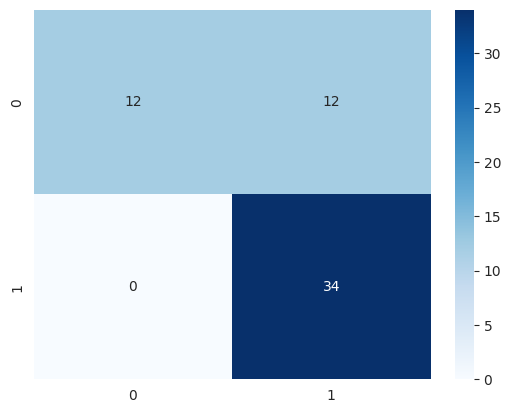

In [51]:
log_train_sca , log_test_sca = rel_ml_scaler(hd4,LogisticRegression)

Accuracy training:100.00%
Accuracy test:74.14%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.74      1.00      0.85        34

    accuracy                           0.79        58
   macro avg       0.87      0.75      0.76        58
weighted avg       0.85      0.79      0.77        58

---CONFUSION MATRIX---


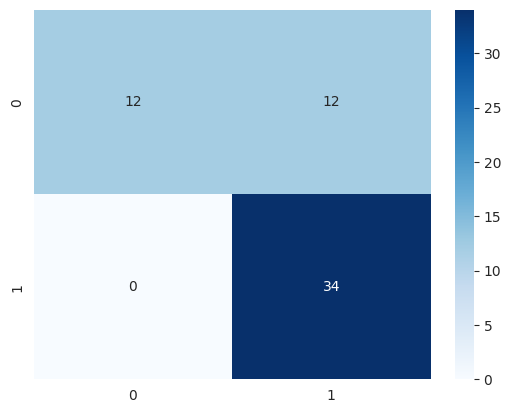

In [52]:
tree_train_sca, tree_test_sca = rel_ml_scaler(hd4,DecisionTreeClassifier)


Accuracy training:92.21%
Accuracy test:81.03%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.74      1.00      0.85        34

    accuracy                           0.79        58
   macro avg       0.87      0.75      0.76        58
weighted avg       0.85      0.79      0.77        58

---CONFUSION MATRIX---


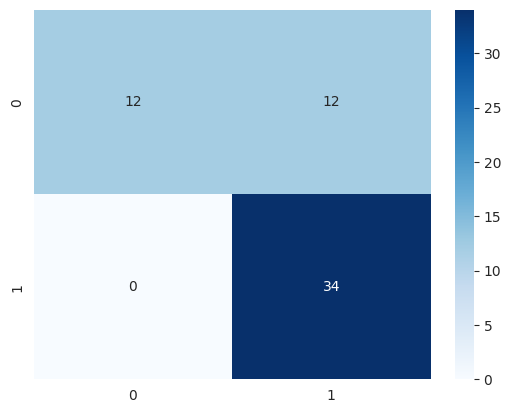

In [53]:
ada_train_sca, ada_test_sca = rel_ml_scaler(hd4,AdaBoostClassifier)

Accuracy training:100.00%
Accuracy test:74.14%
---CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.74      1.00      0.85        34

    accuracy                           0.79        58
   macro avg       0.87      0.75      0.76        58
weighted avg       0.85      0.79      0.77        58

---CONFUSION MATRIX---


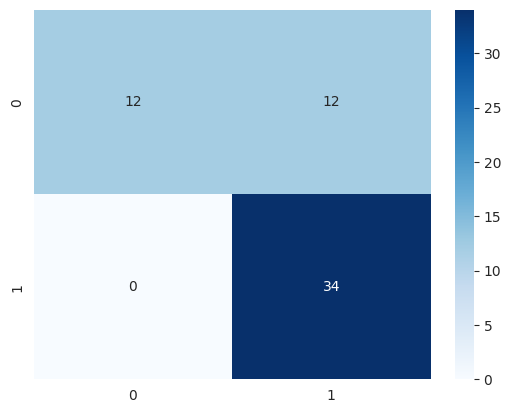

In [54]:
rand_train_sca, rand_test_sca = rel_ml_scaler(hd4, RandomForestClassifier)

In [55]:
data2 = {'Models with Scaler':['RandomForestClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression'],
       'Accuracy training':[round(rand_train_sca*100,2),round(ada_train_sca*100,2),round(tree_train_sca*100,2),round(log_train_sca*100,2)],
       'Accuracy test':[round(rand_test_sca*100,2),round(ada_test_sca*100,2),round(tree_test_sca*100,2),round(log_test_sca*100,2)]
       }    

In [56]:
new_df2 = pd.DataFrame(data2)
new_df2.sort_values(by='Accuracy test', ascending=False, inplace=True)

new_df2

,Models with Scaler,Accuracy training,Accuracy test
3,LogisticRegression,87.01,84.48
1,AdaBoostClassifier,92.21,81.03
0,RandomForestClassifier,100.00,74.14
2,DecisionTreeClassifier,100.00,74.14


In [57]:
new_df

,Models without Scaler,Accuracy training,Accuracy test
3,LogisticRegression,87.88,84.48
1,AdaBoostClassifier,92.21,81.03
0,RandomForestClassifier,100.00,75.86
2,DecisionTreeClassifier,100.00,74.14
